<a href="https://colab.research.google.com/github/wonively523/Hands-On-Meta-Learning-With-Python/blob/master/Assignment_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#코랩연동
from google.colab import drive 
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/



# 1. Input points

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

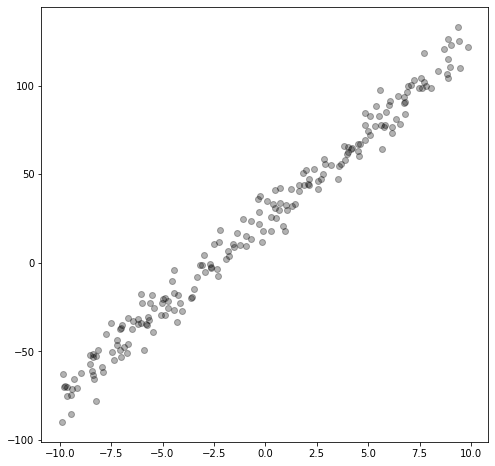

In [8]:
#load CSV file code 
path = "/content/gdrive/My Drive/Colab Notebooks/data.csv"
data = np.genfromtxt(path, delimiter=',')

x_data = data[:, 0]
y_data = data[:, 1]

plt.figure(figsize=(8, 8))
plt.scatter(x_data, y_data, alpha=0.3,color='black')
plt.show()


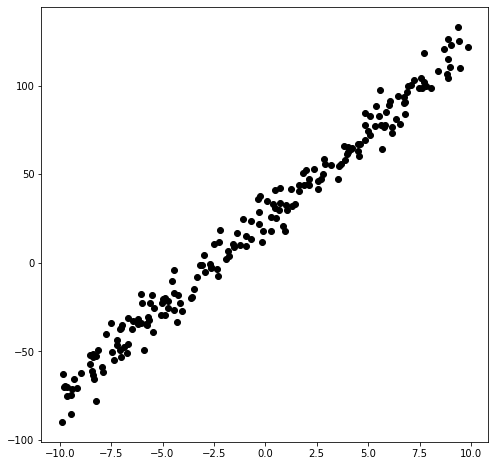

In [12]:
plt.rcParams['figure.figsize'] = (8.0, 8.0)
plt.scatter(x_data, y_data, color="black")
plt.show()


# 2. Output results 

In [50]:
theta1 = 0
theta0 = 0

lr = 0.001  #learning rate
epochs = 1000  # iterations 

m = float(len(x_data)) 

# Gradient Descent 
for i in range(epochs): 
    y_pred = theta1* x_data + theta0  # predicted value of y
    D_theta1 = (-1/m) * sum(x_data * (y_data - y_pred))  
    D_theta0 = (-1/m) * sum(y_data - y_pred)  
    theta1 = theta1 - lr * D_theta1  # Update theta1
    theta0 = theta0 - lr * D_theta0  # Update theta0
    
print (theta1, theta0)

9.791708711028392 15.625525916861832


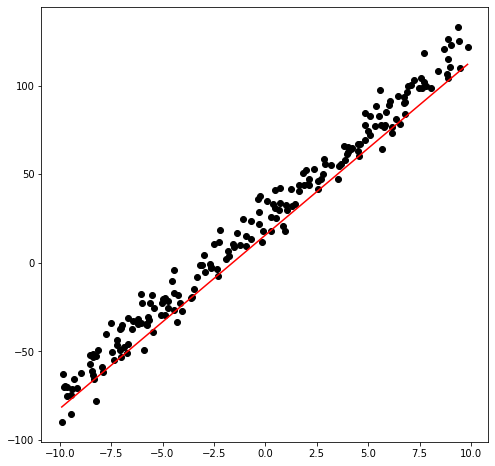

In [51]:
y_pred = theta1* x_data + theta0

plt.scatter(x_data, y_data,color='black') 
plt.plot([min(x_data), max(x_data)], [min(y_pred), max(y_pred)], color='red')  # regression line
plt.show()

# 3. Plotting the energy surface



In [0]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.style.use('ggplot')

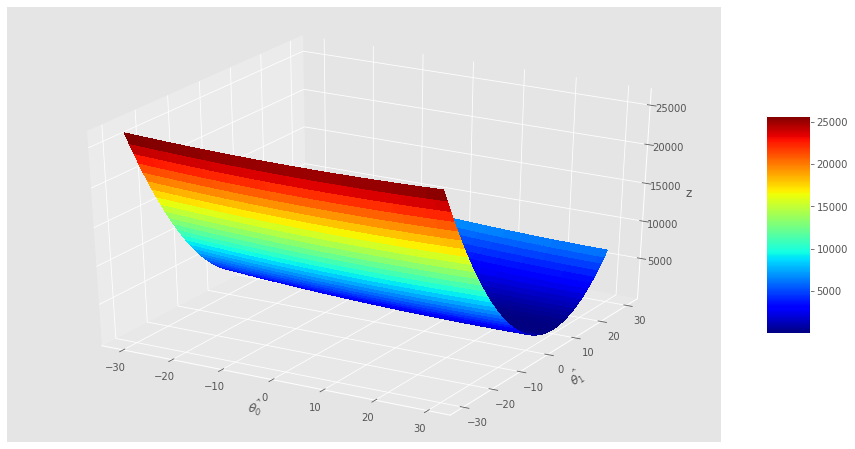

In [111]:
# Try each integer for beta 0 and beta 1 between -100 and 100
theta0 = theta1 = np.arange(-30,30,0.1)

# All combinations of beta_0 and beta_1
plt_theta0, plt_theta1 = np.meshgrid(theta0, theta1)

def calculate_mse(theta0, theta1):
    y_hat = theta0 + theta1 * x_data
    error = y_hat - y_data
    sse = np.sum(error ** 2)
    return ((1 / (2 * len(x_data))) * sse)

calculate_mse_v = np.vectorize(calculate_mse)
mse = calculate_mse_v(plt_theta0, plt_theta1).reshape(len(plt_theta0), len(plt_theta1))

fig = plt.figure(figsize=(16,8))
ax = fig.gca(projection='3d')

surf = ax.plot_surface(plt_theta0,
                       plt_theta1,
                       mse,
                       cmap=cm.jet,
                       linewidth=0,
                       antialiased=False)
ax.set_xlabel(r'$\hat{\theta_0}$')
ax.set_ylabel(r'$\hat{\theta_1}$')
ax.set_zlabel(r'z')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

# 4. Plotting the optimization path 

In [0]:
def get_cost(theta1,theta0,x_data,y_data):   
    m = len(y_data)
    
    cost = (1/2*m) * np.sum(np.square((theta0+theta1 * x_data)-y_data))
    
    return cost

In [146]:
theta1 = 0
theta0 = 0

lr = 0.001  #learning rate
epochs = 1000  # iterations 

m = len(x_data) 
theta1_history = np.zeros((epochs,1))
theta0_history = np.zeros((epochs,1))
cost_history = np.zeros(epochs)


# Gradient Descent 
for i in range(epochs): 
    y_pred = theta1* x_data + theta0  # predicted value of y
    D_theta1 = (-1/m) * sum(x_data * (y_data - y_pred))  
    D_theta0 = (-1/m) * sum(y_data - y_pred)  
    theta1 = theta1 - lr * D_theta1  # Update theta1
    theta0 = theta0 - lr * D_theta0  # Update theta0

    theta1_history[i,:] =theta1.T
    theta0_history[i,:] =theta0.T
    
    cost_history[i]  = get_cost(theta1,theta0,x_data,y_data)

print (theta1, theta0)

9.791708711028392 15.625525916861832


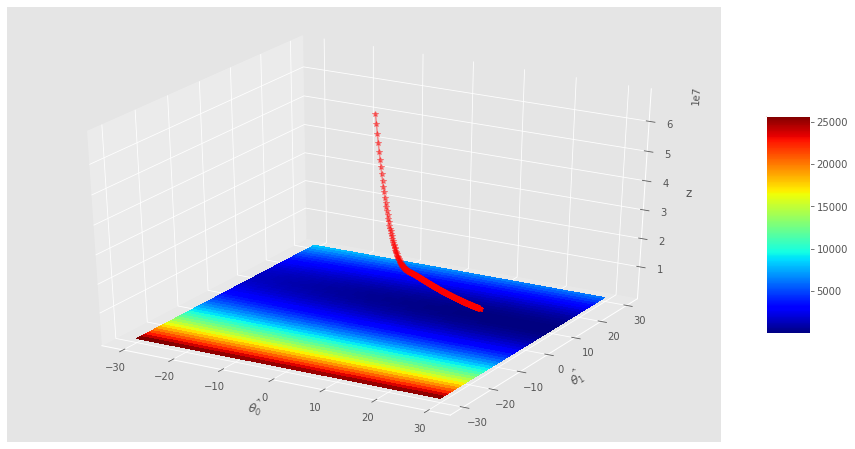

In [161]:
# Try each integer for beta 0 and beta 1 between -100 and 100
theta0 = theta1 = np.arange(-30,30,0.1)

# All combinations of beta_0 and beta_1
plt_theta0, plt_theta1 = np.meshgrid(theta0, theta1)

def calculate_mse(theta0, theta1):
    y_hat = theta0 + theta1 * x_data
    error = y_hat - y_data
    sse = np.sum(error ** 2)
    return ((1 / (2 * len(x_data))) * sse)

calculate_mse_v = np.vectorize(calculate_mse)
mse = calculate_mse_v(plt_theta0, plt_theta1).reshape(len(plt_theta0), len(plt_theta1))

fig = plt.figure(figsize=(16,8))
ax = fig.gca(projection='3d')
ax.plot(theta0_history,theta1_history,cost_history, marker = '*', color = 'red', alpha = .4, label = 'Gradient descent')

surf = ax.plot_surface(plt_theta0,
                       plt_theta1,
                       mse,
                       cmap=cm.jet,
                       linewidth=0,
                       antialiased=False)
ax.set_xlabel(r'$\hat{\theta_0}$')
ax.set_ylabel(r'$\hat{\theta_1}$')
ax.set_zlabel(r'z')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

